In [1]:
import pandas as pd
from pushbullet import Pushbullet
import urllib.request
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import regex
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk import *

In [2]:
API_Key='o.k8KBdcTLiNGbr6Ty7HoURzMT3qGjyVkh'

In [3]:
PB=Pushbullet(API_Key)
Pushes=PB.get_pushes()
Latest=Pushes[0]

In [4]:
url=Latest['file_url']
url

url=Latest['file_url']
file_path="DandL.txt"

In [5]:
urllib.request.urlretrieve(url,file_path)

('DandL.txt', <http.client.HTTPMessage at 0x1b5b869f100>)

In [6]:
with open(file_path, mode='r',encoding='utf-8') as f:
    Pig=f.readlines()

In [7]:
dataset = Pig[1:]
cleaned_data = []
for line in dataset:
	# grab the info and cut it out
	date = line.split(",")[0]
	line2 = line[len(date):]
	time = line2.split("-")[0][2:]
	line3 = line2[len(time):]
	name = line3.split(":")[0][4:]
	line4 = line3[len(name):]
	message = line4[6:-1] # strip newline charactor

print(date, time, name, message)
cleaned_data.append([date, time, name, message])

6/12/21 10:00 AM  Sarvesh Tcs https://www.newindianexpress.com/business/2021/jun/11/will-ask-employees-to-return-to-offices-post-pandemic-tcs-2314712.html


In [8]:
Akki=pd.DataFrame(cleaned_data,columns=['Date','Time','Name','Message'])
Akki.to_excel('DandL.xlsx',index=False)

In [9]:
Group=pd.read_excel('C:\\Users\\axays\\Desktop\\DandL.xlsx')

In [10]:
Talk=Group.dropna()
Talk2 = Talk[(Talk.Message != '<Media omitted>')]

Talk2['Date'] = pd.to_datetime(Talk2['Date'], errors='coerce')

<ipython-input-10-1cb42e76a9db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Talk2['Date'] = pd.to_datetime(Talk2['Date'], errors='coerce')


In [11]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

Talk2['Day'] = Talk2['Date'].dt.weekday.map(weeks)
Talk2 = Talk2[['Date','Day','Time','Name','Message']]
Talk2['Day'] = Talk2['Day'].astype('category')


<ipython-input-11-97318cd60fa1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Talk2['Day'] = Talk2['Date'].dt.weekday.map(weeks)


In [12]:
Talk2.head()

Date      Day       Time        Name  \
2 2019-02-19  Tuesday   1:42 PM   Keagon Tcs   
3 2019-02-19  Tuesday   8:56 PM    Parth Tcs   
4 2019-02-22   Friday  11:03 AM    Parth Tcs   
8 2019-02-26  Tuesday  11:07 AM   Keagon Tcs   
9 2019-02-26  Tuesday  11:11 AM    Parth Tcs   

                                             Message  
2  Team, Kindly reach out to Manisha if anything ...  
3  https://www.expresscomputer.in/news/sachin-ten...  
4    हेलमेट होते म्हणून याला दोन वेळा जीवनदान मिळाले  
8  Surgical Strikes 2.0 LIVE: Indian Air Force Dr...  
9  In 21 min attack approx 200-300 terrorist are ...

In [13]:
Talk2['Letters']=Talk2['Message'].apply(lambda s: len(s))

# Counting number of word's in each message
Talk2['Words']=Talk2['Message'].apply(lambda s: len(s.split(' ')))

Link = r'(https?://\S+)'
Talk2['Url_Count'] = Talk2.Message.apply(lambda x: re.findall(Link, x)).str.len()
URLPATTERN = np.sum(Talk2.Url_Count)

Talk2["MessageCount"]=1

In [14]:
l = Talk2.Name.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = Talk2[Talk2["Name"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
  ### shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
  words_per_message = (np.sum(req_df['Words']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)
  links = sum(req_df["Url_Count"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------')

--> Stats of Keagon Tcs <-- 
Total Message Sent :  617
Average Words per Message :  11.700
Total Links Sent :  18

----------------------------------------------------------
--> Stats of Parth Tcs <-- 
Total Message Sent :  1438
Average Words per Message :  4.370
Total Links Sent :  13

----------------------------------------------------------
--> Stats of Nairobi <-- 
Total Message Sent :  103
Average Words per Message :  6.100
Total Links Sent :  5

----------------------------------------------------------
--> Stats of Gunjan Pru <-- 
Total Message Sent :  3
Average Words per Message :  2.670
Total Links Sent :  0

----------------------------------------------------------
--> Stats of Joy Tcs <-- 
Total Message Sent :  46
Average Words per Message :  8.830
Total Links Sent :  0

----------------------------------------------------------
--> Stats of +91 72087 28817 <-- 
Total Message Sent :  8
Average Words per Message :  2.880
Total Links Sent :  0

------------------------------

Text(0, 0.5, 'Time')

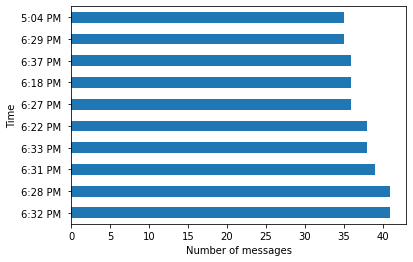

In [15]:
Talk2['Time'].value_counts().head(10).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')

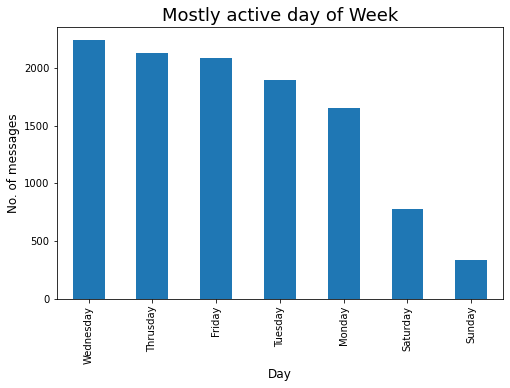

In [11]:
import plotly.express as px
### Top 10 peoples that are mostly active in our Group is :
plt.figure(figsize=(8,5))
active_day = Talk2['Day'].value_counts()
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

2020-03-25    211
2020-04-13    192
2020-03-27    181
2020-03-26    166
2020-04-09    159
             ... 
2019-04-07      1
2019-07-05      1
2019-05-23      1
2019-05-22      1
2019-05-14      1
Name: Date, Length: 615, dtype: int64


Text(0, 0.5, 'Date')

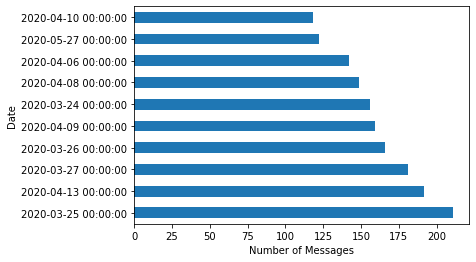

In [13]:
#Most happening day
Talk2['Date'].value_counts().head(10).plot.barh()
print(Talk2['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [14]:
auth = Talk2.groupby("Name").sum()
auth.reset_index(inplace=True)
auth.sort_values(by=['MessageCount'], inplace=True, ascending=False)

In [15]:
auth

Name  Letters  Words  \
35                                          Parth Tcs    32914   6291   
38                                              Salah    56811   9916   
19                                     Abhi MistryTCS    42071   7531   
40                                        Sarvesh Tcs    23578   3970   
32                                        Neelima Tcs    22800   4424   
25                                         Jaimin Tcs    13973   2849   
28                                         Keagon Tcs    41089   7217   
12                                    +91 97733 92889     9355   1850   
3                                     +91 80823 01616    11882   2192   
20                                       Ashitosh Tcs     6683   1376   
22                                             Axay💪🏼     6950   1390   
16                                    +91 99203 82399     6544   1213   
36                                          Rohit Tcs    12347   2162   
41                                          Shree Tcs     6124   1233   
33                                         Nikhil Tcs     5800   1212   
34                                       Nikhlesh Tcs     5513   1127   
15                                    +91 98205 13068     5827   1224   
30                                         Majeed Tcs     6464   1189   
21                                          Atish Tcs     4661    938   
13                                    +91 98190 44056    18118   3274   
37                                   Sachin Salamwade     3079    561   
31                                            Nairobi     3628    628   
29                                          Kunal Tcs     2782    531   
26                                         Joseph Tcs     2911    528   
39                                          Samuh Tcs     1075    209   
27                                            Joy Tcs     2038    406   
7                                     +91 87930 15637      280     65   
17                                    +91 99759 55870      200     49   
9                                     +91 91677 66608       82     19   
11                                    +91 97308 98999      165     39   
0                                     +91 70391 36411      145     29   
1                                     +91 72085 73080      453     77   
4                                     +91 80971 53849      121     24   
10                                    +91 96196 09520      142     30   
5                                     +91 83695 96995      100     18   
6                                     +91 83903 05595      290     59   
2                                     +91 72087 28817      114     23   
24                                         Gunjan Pru       44      8   
14                                    +91 98193 23482       46     10   
23                                          Batul Tcs       89     14   
18                                                  5       66     10   
8                                     +91 88984 65967        1      1   
42                         TCS SOE,. Connection model       34      6   
43  pening of these institutions will be taken in ...       26      4   

    Url_Count  MessageCount  
35         13          1438  
38         12          1141  
19         10           937  
40         36           795  
32          0           728  
25          0           664  
28         18           617  
12          2           444  
3           0           428  
20          0           393  
22          2           377  
16          1           357  
36          1           327  
41          0           290  
33          0           289  
34          0           289  
15          0           268  
30          0           240  
21          0           224  
13          2           200  
37          2           164  
31          5           103  
29          0            95  
26          0            87  
39          0

In [16]:
text = ""
for review in Talk2.Message:
    sen = review.split()
    for word in sen:
        if len(word) > 2:
            text = text + " " + word


# text = " ".join(review.lower() for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 329874 words in all the messages.


In [17]:
Talk2['Words'].sum()

65926

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(["hai","mama","bhai","bahut","kaafi","nahi","hai","kuch","will","liye","ha", "pe", "se", "aur", "mein", "ki", "ah","ha","la","hahaha","ne","le","ni","lo","Ma","Haa","ni"])
    

In [19]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

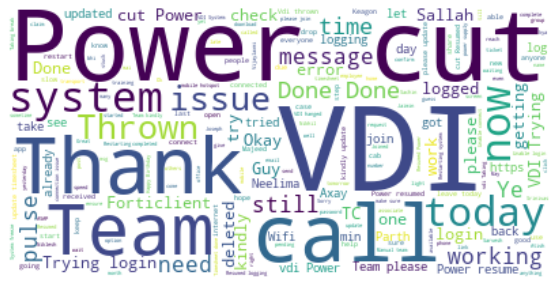

In [21]:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Keagon Tcs


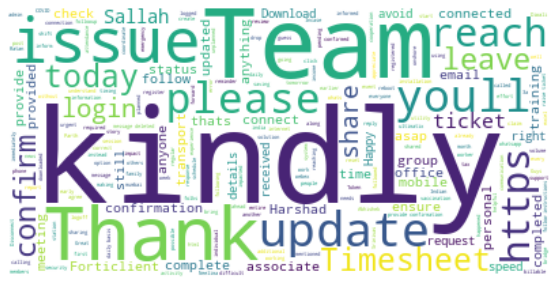

Author name Parth Tcs


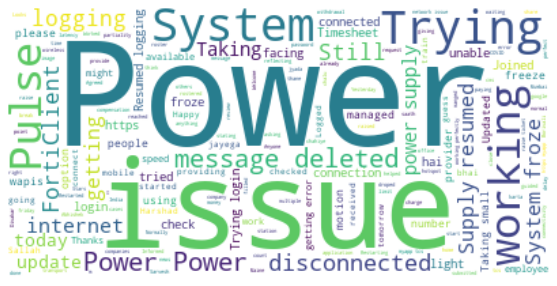

Author name Nairobi


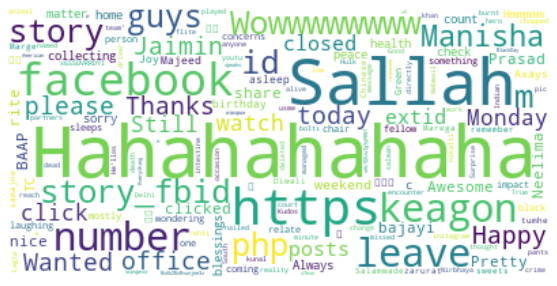

Author name Gunjan Pru


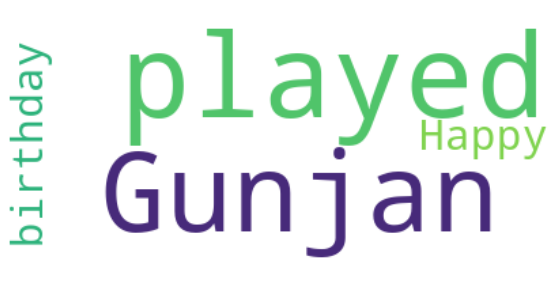

Author name Joy Tcs


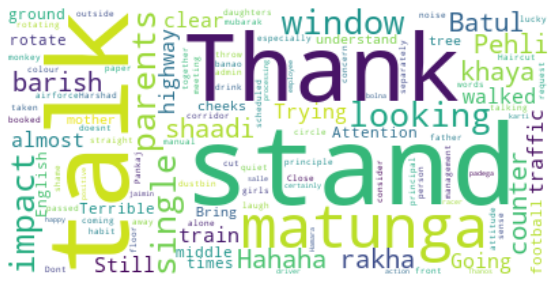

Author name +91 72087 28817


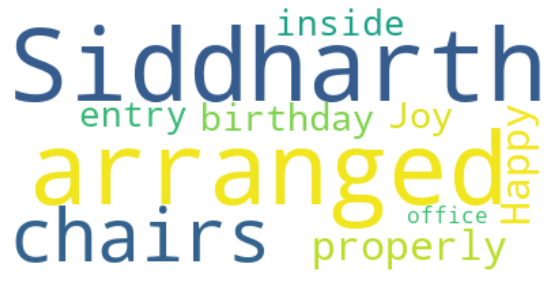

Author name +91 83903 05595


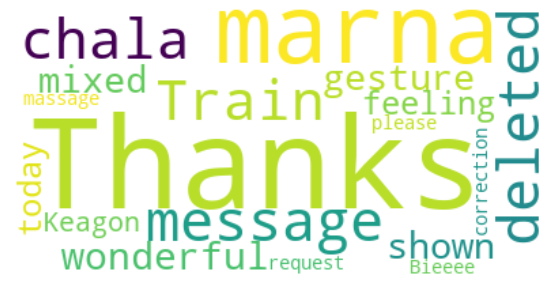

Author name +91 83695 96995


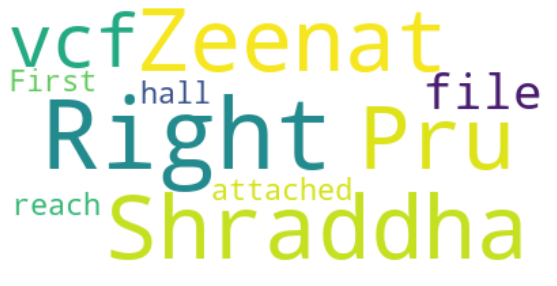

Author name Batul Tcs


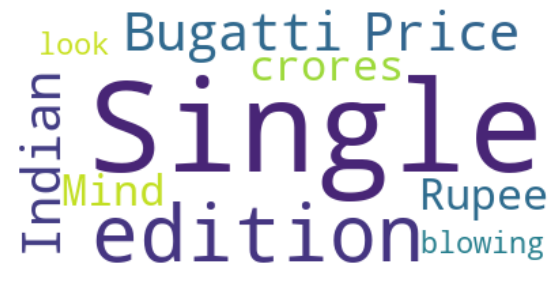

Author name Neelima Tcs


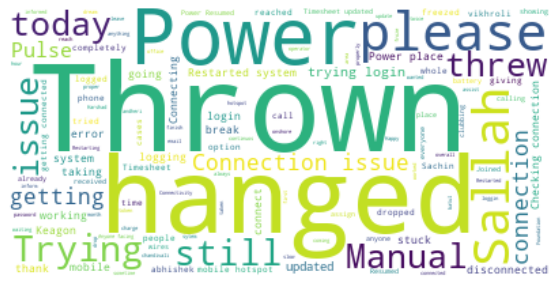

Author name +91 87930 15637


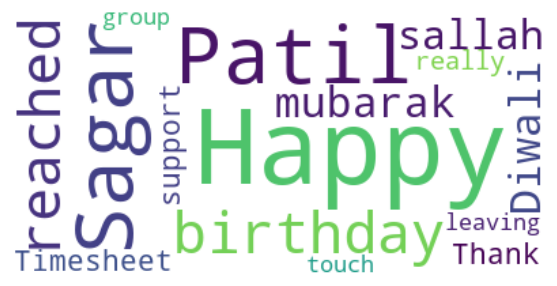

Author name Axay💪🏼


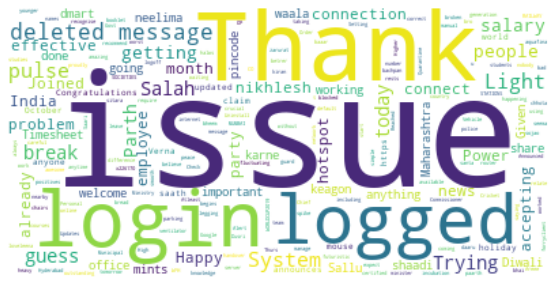

Author name +91 72085 73080


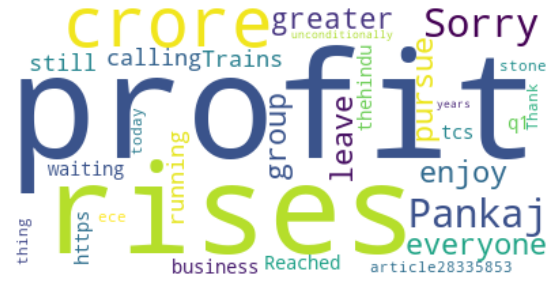

Author name +91 98190 44056


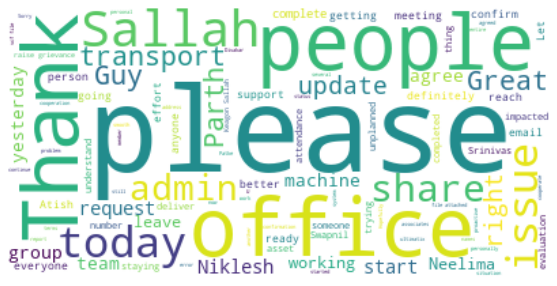

Author name Salah


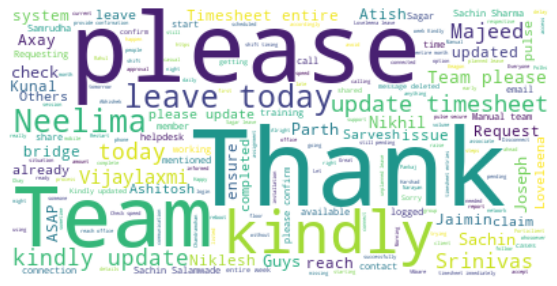

Author name +91 80823 01616


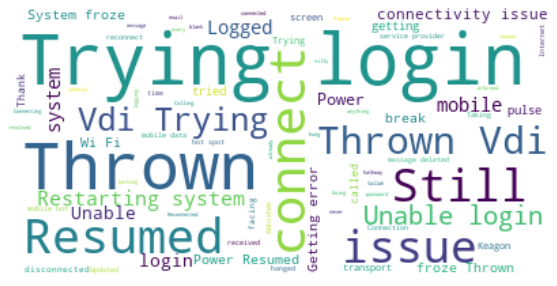

Author name Majeed Tcs


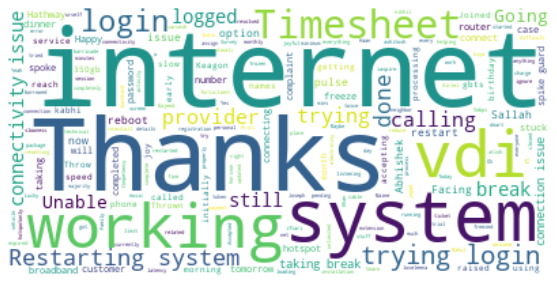

Author name Nikhil Tcs


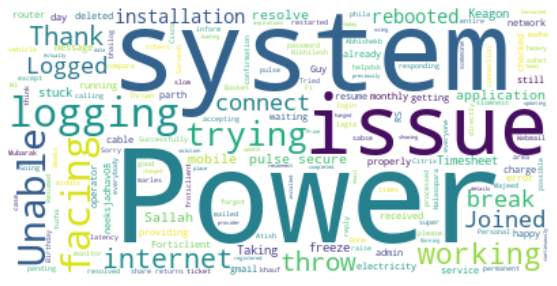

Author name Samuh Tcs


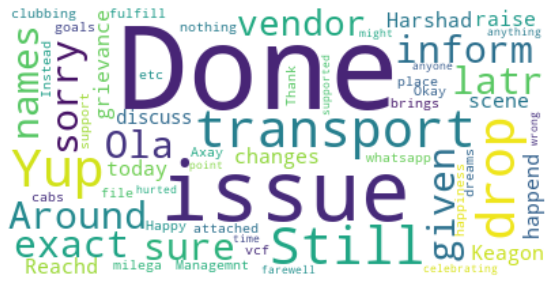

Author name Jaimin Tcs


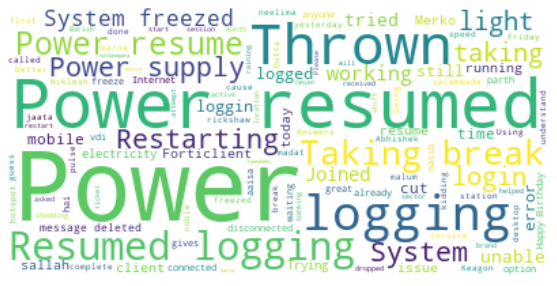

Author name Ashitosh Tcs


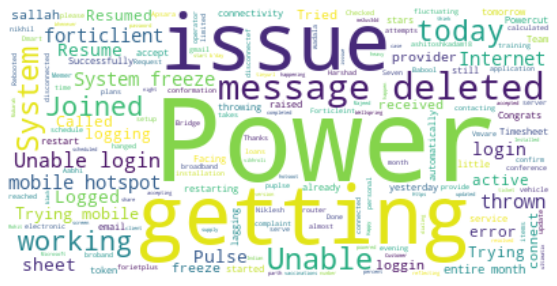

Author name Shree Tcs


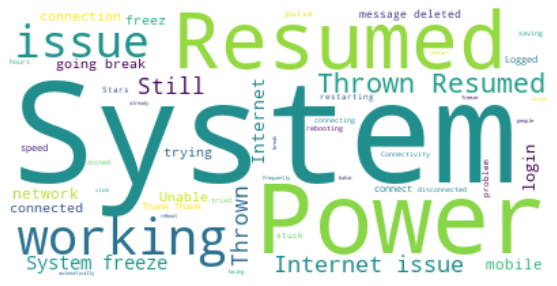

Author name Nikhlesh Tcs


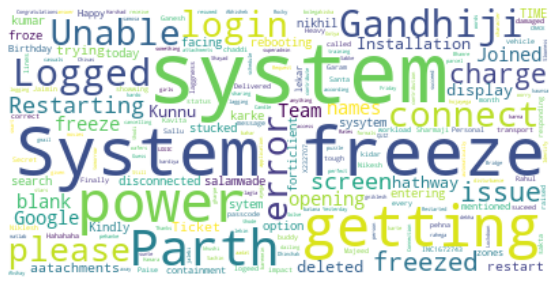

Author name Sachin Salamwade


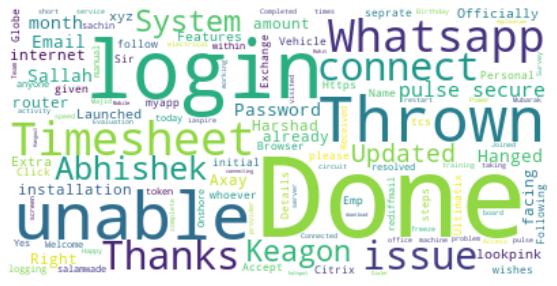

Author name Joseph Tcs


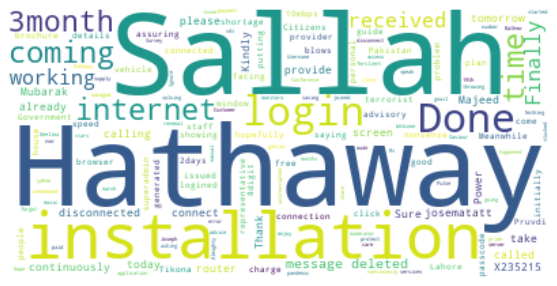

Author name Atish Tcs


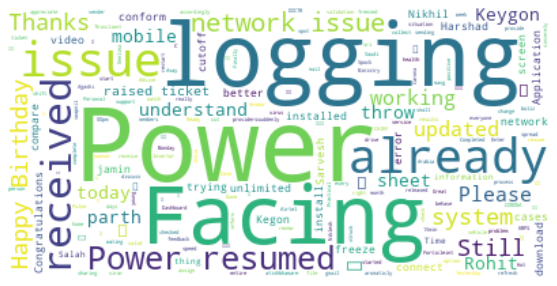

Author name Sarvesh Tcs


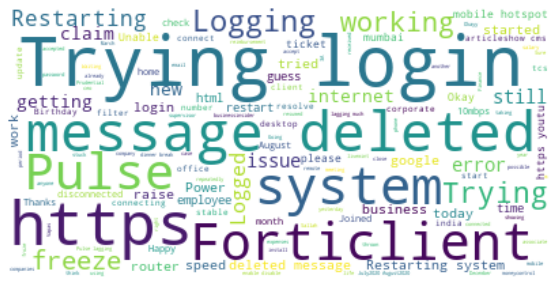

Author name +91 97733 92889


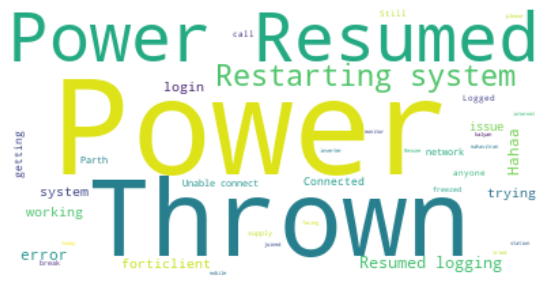

Author name +91 88984 65967


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [29]:
l = Talk2.Name.unique()
for i in range(len(l)):
  dummy_df = Talk2[Talk2['Name'] == l[i]]
  text = ""
  for review in dummy_df.Message:
    sen = review.split()
#     print(sen)
    for word in sen:
        if len(word) > 4:
            text = text + " " + word

#   text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
  # Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()